# Regularization Norms

For the linear inverse problem, we arrived at Tikhonov regularization by an argument deriving from the definition of the pseudoinverse of $F$, but saw that it satisified an optimization problem that tries to balance to two objects of minimizing the residual $\|Fx - b\|$ and the solution norm $\|x\|$:

$$ x_\alpha = \text{argmin}_x \frac{1}{2}\|Fx - b\|_2^2 + \frac{\alpha}{2} \|x\|_2^2.$$

This form is nice, because it generalizes to

- Nonlinear inverse problems, and
- Difference regularizers than \|x\|_2^2.

A general form of regularized inverse problem that describes several methods is

$$x_\alpha = \text{argmin}_s J(x) := \frac{1}{2}\|F(x) - b\|_2^2 + \alpha R(x),$$

Where we use $F(x)$ instead of $Fx$ to indicate that the parameter-to-data map $F$ is nonlinear, and
$R(x):V \to \mathbb{R}$ is an regularization operator.

What sort of properties would we like $R$ to have?

- It should be bounded below so that $J(x)$ has an infimum,
- It should be "nice" to compute with: solving an optimization problem for $J(x)$ is probably at least as hard as solving an optimization problem for $R(x)$.  Properties that can make $R(x)$ nice to compute with include smoothness and convexity.

$R(x)$ is how we penalize what, all other things being equal, we would consider a bad solution.  Because scientists generally subscribe to [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor), a general strategy is for $R(x)$ to penalize solutions that are seen as complex.  And what we mean by "complex" can be problem dependent.

**What does a choice of $R(x) = \frac{1}{2}\|x\|_2^2$ say about complexity?**  It says that big solutions are more complex than small solutions.  But in measuring bigness by the $\ell_2$-norm, we are saying that we want our measure of bigness to be independent of the coordinate system that we use for $x$.  This is good if the parameter space exhibits symmetry (rotations) over which the choice of basis is essentially arbitrary.  This regularization is very nice to work with because it is smooth, strongly convex, and its Hessian is constant.

**What does a choice of $R(x) = \|x\|_1$ say about complexity?** It says that big solutions are more complex than small solutions.  But by measure bigness in the $\ell_1$-norm, we are saying that our coordinate system is not arbitrary, but that exchanging quantities between two of the variables does not matter: what matters is the "total" amount.  But, it is not smooth, and it is convex but not strongly so.

To give some visual intuition about the difference between the two, let's look at the contours for regularized
objectives $J(x)$ in two variables with $\ell_2$ and $\ell_1$ regularization.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from numpy.linalg import solve

In [2]:
epsilon = 0.5
F = np.array([[1, 2],[0, epsilon]])
d = randn(2)
Fd = F.T.dot(d)
x_true = solve(F,d)
maxabs = max(abs(x_true))

def J(x):
    r = F.dot(x) - d
    return 0.5 * r.dot(r)

Here are the contours of the unregularized objective.  If I did not label the true solution $x_{true}$, it might be hard to pick out.

In [3]:
ls = np.linspace(-2.*maxabs, 2.*maxabs, 100)
X,Y = np.meshgrid(ls,ls)

XY = np.concatenate([[X.flatten()],[Y.flatten()]],axis=0).T
M = np.array([J(x) for x in XY]).reshape(X.shape)
plt.contour(X,Y,M)
plt.plot(0.,0.,'bo')
plt.plot(x_true[0],x_true[1],'rx')
plt.title('Contours of 1/2 * ||F x - d||^2')
plt.axis('equal')
plt.show()

To let you explore the full range of regularization parameters, we will pass in $\beta = \alpha / (1 + \alpha)$ and plot the contours of $(1 - \beta)/2 \|F x - d\|^2 + \beta R(x)$.

In [4]:
R = np.array([0.5 * (x[0]*x[0]+ x[1]*x[1]) for x in XY]).reshape(X.shape)
I2 = np.eye(2)
FTF = F.T.dot(F)

def reg_contours(beta):
    x_reg = solve(beta * I2 + (1. - beta)*FTF,(1. - beta)*Fd)
    plt.contour(X,Y,(1. - beta) * M + beta * R)
    print("x_reg = {}".format(x_reg))
    plt.plot(0.,0.,'bo')
    plt.plot(x_true[0],x_true[1],'rx')
    plt.plot(x_reg[0],x_reg[1],'r+')
    plt.title('Regularized contours') 
    plt.axis('equal')
    plt.show()

from ipywidgets import interact, FloatSlider
interact(reg_contours,beta=FloatSlider(value=0.5,min=0.,max=1.,step=0.01))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.01), Output()), _dom_classes=…

<function __main__.reg_contours(beta)>

Now here are the $\ell_1$ regularized contours

In [5]:
R = np.array([abs(x[0]) + abs(x[1]) for x in XY]).reshape(X.shape)
I2 = np.eye(2)
FTF = F.T.dot(F)

from scipy.optimize import minimize

def reg_contours(beta):
    def J_1(x):
        return (1. - beta) * J(x) + beta * (abs(x[0]) + abs(x[1]))

    result = minimize(J_1,x_true)
    x_reg = result.x
    print("x_reg = {}".format(x_reg))
    plt.contour(X,Y,(1. - beta) * M + beta * R)
    plt.axhline(y=0)
    plt.axvline(x=0)
    plt.plot(0.,0.,'bo')
    plt.plot(x_true[0],x_true[1],'rx')
    plt.plot(x_reg[0],x_reg[1],'r+')
    plt.title('Regularized contours') 
    plt.axis('equal')
    plt.show()

from ipywidgets import interact, FloatSlider
interact(reg_contours,beta=FloatSlider(value=0.5,min=0.,max=1.,step=0.01,continuous_update=False))

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='beta', max=1.0, step=0.01),…

<function __main__.reg_contours(beta)>

You may have noticed that the regularized solution for the $\ell_1$ regularization tends to stick to the coordinate axes.  This turns out to generalize to lots of problems: $\ell_1$ regularization favors sparse solutions.

We saw $\ell_2$ regularization for image deblurring: let's see $\ell_1$:

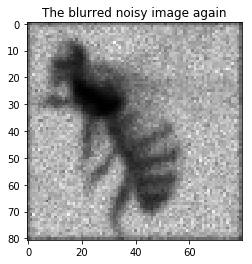

In [6]:
from blurring_example import numpy_wikicommons_image, blurring_mat, blurring_op

plt.set_cmap('gray')
X = numpy_wikicommons_image('d/db/Stinglessbee.png', grayscale=True)
N = X.shape[0] * X.shape[1]
F = blurring_op(2, X.shape)
B = F(X)
B_n = B * (1. + 0.1 * randn(B.shape[0],B.shape[1]))
plt.imshow(B_n)
plt.title("The blurred noisy image again")
plt.show()

Here is a very simple and not very fast ADMM solver for the l1 regularization problem (LASSO):

In [72]:
def l1_deblur(alpha, X_reg, ptol=1.e-6, dtol=1.e-6, disp = False):
    
    rho = 1.e-1
    Z = np.zeros(X_reg.shape)
    U = np.ones(X_reg.shape)
    
    for i in range(10000):
        X_reg = F.solve(rho,B_n,W=rho * (Z - U))
        Zold = Z
        Z = shrink(X_reg + U,alpha / rho)
        Zchange = np.linalg.norm(Z - Zold)
        U = U + (X_reg - Z)
        Pdiff = np.linalg.norm(X_reg - Z)
        if disp and not i % 1000:
            print(np.linalg.norm(X_reg-Z),rho * np.linalg.norm(U))
        if (Zchange < dtol *  np.linalg.norm(U) and Pdiff < ptol * max(np.linalg.norm(X), np.linalg.norm(Z))):
            break
    return X_reg

Here we do a Morozov's discrepancy principle search for the regularization parameter for $\ell_1$ regularization and view the result:

6.766822840690506
1e-08
4.6186489924600735
0.0001
4.850114428736069
0.01
5.367805412973486
0.1
9.960017119203025
0.03162277660168379
6.003669092296679
0.05623413251903491
7.174255005956781
0.042169650342858224
6.454694673430956
0.04869675251658631
6.7742263267111555


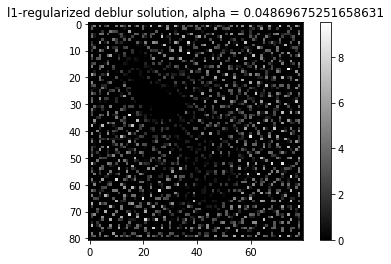

In [73]:
Bnorm = np.linalg.norm(B_n)
noise = 0.1 * Bnorm
print(noise)

alpha_min = 1.e-16
alpha_max = 1.

X_reg = np.zeros(X.shape)
while np.log10(alpha_max) - np.log10(alpha_min) > 0.1:
    alpha = 10.**((np.log10(alpha_max)+np.log10(alpha_min))/2.)
    print(alpha)
    X_reg = l1_deblur(alpha, X_reg)
    r = F(X_reg) - B_n
    r_norm = np.linalg.norm(r)
    print(r_norm)
    if r_norm < noise:
        alpha_min = alpha
    else:
        alpha_max = alpha

plt.imshow(X_reg)
plt.title('l1-regularized deblur solution, alpha = {}'.format(alpha))
plt.colorbar()
plt.show()

As you can see, if we consider the magnitude of a pixel (with 0 being black and 1 being white), we will find as dark an image that blurs to $B_n$ as possible.

In [10]:
def D_x(X):
    return X[1:,:] - X[0:-1,:]
def D_x_T(X):
    Y = np.zeros((X.shape[0]+1,X.shape[1]))
    Y[0,:] = -X[0,:]
    Y[1:-1,:] = X[0:-1,:]- X[1:,:]
    Y[-1,:] = X[-1,:]
    return Y

def D_y(X):
    return X[:,1:] - X[:,0:-1]
def D_y_T(X):
    Y = np.zeros((X.shape[0],X.shape[1]+1))
    Y[:,0] = -X[:,0]
    Y[:,1:-1] = X[:,0:-1]- X[:,1:]
    Y[:,-1] = X[:,-1]
    return Y

def h1(X):
    ddx = D_x_T(D_x(X)).flatten().dot(X.flatten())
    ddy = D_y_T(D_y(X)).flatten().dot(X.flatten())
    return 0.5 * (ddx + ddy)

def grad_h1(X):
    return D_x_T(D_x(X)) + D_y_T(D_y(X))

def hessp_h1(X,P):
    return D_x_T(D_x(P)) + D_y_T(D_y(P))

